In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df= pd.read_csv('DataCO2.csv')
df

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [4]:
# Mengetahui type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [5]:
# Melihat statistika deskiptif
df.describe()

,Volume,Bobot,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [6]:
# Cek Missing value
df.isna().sum()

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [7]:
# Transformasi data
label_encoder = LabelEncoder()

# Ubah kolom 'Nama' dan 'Model' menjadi data numerik
df['Nama'] = label_encoder.fit_transform(df['Nama'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df

,Nama,Model,Volume,Bobot,CO2
0,14,10,1000,790,99
1,10,29,1200,1160,95
2,12,14,1000,929,95
3,2,4,900,865,90
4,9,16,1500,1140,105
5,15,31,1000,929,105
6,12,18,1400,1109,90
7,8,5,1500,1365,92
8,3,19,1500,1112,98
9,0,6,1600,1150,99


MSE: 52.322793128940226
RMSE: 7.233449600912432
MAE: 5.992362265279091
R-squared: 0.3958761031477225


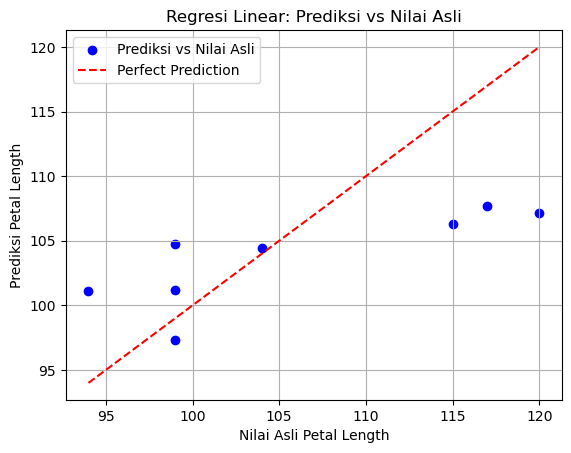

In [ ]:
# Regresi Multivariable
X = df[['Model', 'Volume', 'Bobot']].values  # Fitur
y = df['CO2'].values  # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

plt.scatter(y_test, y_pred_test, color='blue', label='Prediksi vs Nilai Asli')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', label='Perfect Prediction')
plt.xlabel('Nilai Asli Petal Length')
plt.ylabel('Prediksi Petal Length')
plt.title('Regresi Linear: Prediksi vs Nilai Asli')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sigmoid dan Cubic
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cubic(x):
    return x ** 3

# Terapkan fungsi sigmoid dan cubic pada kolom Volume dan Bobot
df['Volume_sigmoid'] = df['Volume'].apply(sigmoid)
df['Bobot_sigmoid'] = df['Bobot'].apply(sigmoid)
df['Volume_cubic'] = df['Volume'].apply(cubic)
df['Bobot_cubic'] = df['Bobot'].apply(cubic)
df


,Nama,Model,Volume,Bobot,CO2,Volume_sigmoid,Bobot_sigmoid,Volume_cubic,Bobot_cubic
0,14,10,1000,790,99,1.0,1.0,1000000000,493039000
1,10,29,1200,1160,95,1.0,1.0,1728000000,1560896000
2,12,14,1000,929,95,1.0,1.0,1000000000,801765089
3,2,4,900,865,90,1.0,1.0,729000000,647214625
4,9,16,1500,1140,105,1.0,1.0,3375000000,1481544000
5,15,31,1000,929,105,1.0,1.0,1000000000,801765089
6,12,18,1400,1109,90,1.0,1.0,2744000000,1363938029
7,8,5,1500,1365,92,1.0,1.0,3375000000,2543302125
8,3,19,1500,1112,98,1.0,1.0,3375000000,1375036928
9,0,6,1600,1150,99,1.0,1.0,4096000000,1520875000
